In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline


In [2]:
df=pd.read_csv('tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


for claim_status

In [4]:
df['claim_status'].unique()

array(['claim', 'opinion', nan], dtype=object)

In [5]:
df[df['claim_status'].isnull()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [6]:
df['claim_status']=df['claim_status'].fillna(value='opinion')

In [7]:
claim_values=df['claim_status'].value_counts().values

In [8]:
claim_index=df['claim_status'].value_counts().index
claim_index

Index(['opinion', 'claim'], dtype='object', name='claim_status')

## claim_status

([<matplotlib.patches.Wedge at 0x2075ddd4910>,
 [Text(-0.014798105203518494, 1.0999004573516578, 'opinion'),
  Text(0.014798002223405677, -1.0999004587371515, 'claim')],
 [Text(-0.008071693747373723, 0.599945704009995, '50.43%'),
  Text(0.008071637576403097, -0.599945704765719, '49.57%')])

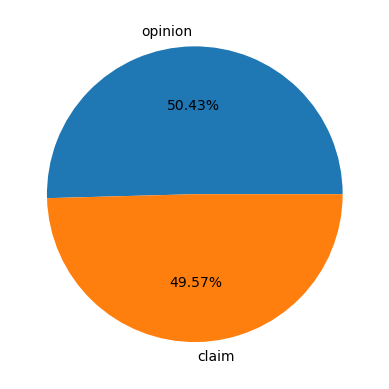

In [9]:
plt.pie(x=claim_values,labels=claim_index,autopct='%1.2f%%')

Observations: more than 50% are claim and neary eqaual are opinion

In [10]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [11]:
df['video_duration_sec'].unique()

array([59, 32, 31, 25, 19, 35, 16, 41, 50, 45, 47, 30, 51, 20, 42, 10, 11,
       27, 34, 52, 54, 39, 33, 22, 21, 48, 55, 23, 12, 29, 46,  5, 17, 18,
       36, 53, 40, 49, 13, 56, 37, 44, 26, 43,  7,  8, 28, 24, 57,  9, 60,
       58, 38, 15,  6, 14], dtype=int64)

In [12]:
df.shape

(19382, 12)

In [13]:
lessthan_25sec=df[df['video_duration_sec']<25]
lessthan_25sec=len(lessthan_25sec)
lessthan_25sec

6994

In [14]:
morethan_25sec=len(df[df['video_duration_sec']>25])
morethan_25sec

12062

## video durations

([<matplotlib.patches.Wedge at 0x2075dde1810>,
 [Text(0.44628351537096766, 1.0054009269481163, 'lessthan_25sec'),
  Text(-0.44628360950339413, -1.0054008851640335, 'morethan_25sec')],
 [Text(0.24342737202052778, 0.5484005056080633, '36.70%'),
  Text(-0.24342742336548767, -0.5484004828167455, '63.30%')])

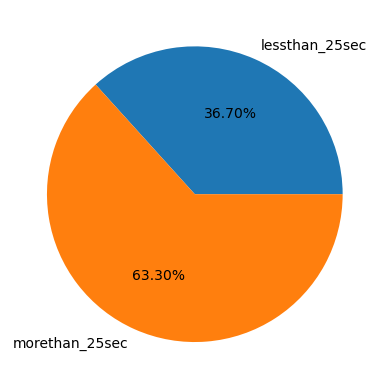

In [15]:
## durations 
plt.pie(x=[lessthan_25sec,morethan_25sec],labels=['lessthan_25sec','morethan_25sec'],autopct='%1.2f%%')

observations: more than 63.30% of video are greater than 25seconds 

## video durations<25sec vs there views count

In [16]:
df['video_view_count'].unique()

array([3.43296e+05, 1.40877e+05, 9.02185e+05, ..., 7.34000e+02,
       3.39400e+03,         nan])

In [17]:
df['video_view_count']=df['video_view_count'].fillna(1)


In [18]:
df['video_view_count'].isnull().sum()

0

In [19]:
views=len(df[(df['video_duration_sec']<25) & (df['video_view_count']>500000)])
x=len(df)-views
x

17674

([<matplotlib.patches.Wedge at 0x2075de86410>,
 [Text(1.0581143383840377, 0.30065602755659243, 'video_durations<25sec_views'),
  Text(-1.0581143594961218, -0.30065595325573113, 'video_durations>25sec_views')],
 [Text(0.5771532754822023, 0.1639941968490504, '8.81%'),
  Text(-0.5771532869978845, -0.16399415632130787, '91.19%')])

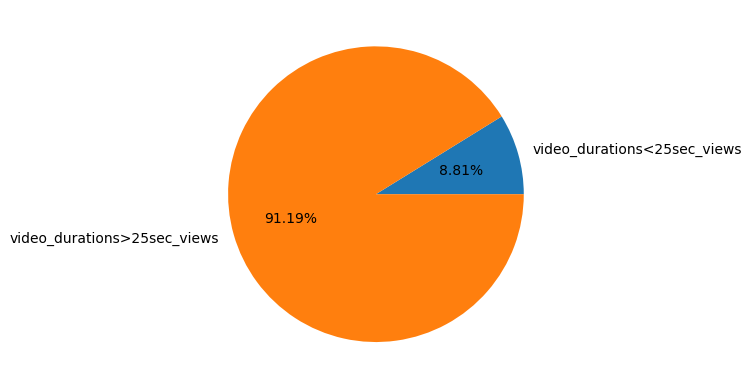

In [20]:
plt.pie(x=[views,x],autopct='%1.2f%%',labels=['video_durations<25sec_views','video_durations>25sec_views'])


observations: videos with durations <25sec and having views more than 500000 is 8.81% of total views 

In [21]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


## videos having views more than 500000


In [22]:
y=len(df[df['video_view_count']>500000])
y

4819

In [23]:
x1=len(df)-y
x1

14563

([<matplotlib.patches.Wedge at 0x2075e57a8d0>,
 [Text(0.7811512445758761, 0.774469323535516, 'morethan>500000'),
  Text(-0.7811511720648219, -0.7744693966721702, 'lessthan<500000')],
 [Text(0.42608249704138695, 0.42243781283755416, '24.86%'),
  Text(-0.4260824574899028, -0.4224378527302746, '75.14%')])

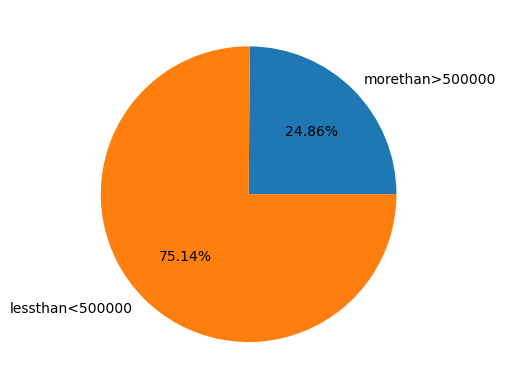

In [24]:
plt.pie(x=[y,x1],autopct='%1.2f%%',labels=['morethan>500000','lessthan<500000'])

observations: out of the total views 24.86% videos having views count more than 500000 and 75.14% less than that.

In [25]:
df.isnull().sum()

#                             0
claim_status                  0
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count              0
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [26]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [27]:
df['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

In [28]:
df['video_transcription_text'].unique()
df['video_transcription_text']=df['video_transcription_text'].fillna(value='someone shared with me that drone deliveries are already happening and will become common by 2025')

In [29]:
df.isnull().sum()

#                             0
claim_status                  0
video_id                      0
video_duration_sec            0
video_transcription_text      0
verified_status               0
author_ban_status             0
video_view_count              0
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [30]:
df['video_like_count']=df['video_like_count'].fillna(value=df['video_like_count'].mean())

In [31]:
df['video_share_count']=df['video_share_count'].fillna(value=df['video_share_count'].mean())

In [32]:
df['video_download_count']=df['video_download_count'].fillna(value=df['video_download_count'].mean())

In [33]:
df['video_comment_count']=df['video_comment_count'].fillna(value=df['video_comment_count'].mean())

In [34]:
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

## verified vs not verified claims



In [35]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [36]:
df['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

In [37]:
verified_st=df.groupby(['claim_status'])['verified_status'].value_counts().values
verified_st

array([9399,  209, 8743, 1031], dtype=int64)

In [38]:
verified_index=df.groupby(['claim_status'])['verified_status'].value_counts().index
verified_index

MultiIndex([(  'claim', 'not verified'),
            (  'claim',     'verified'),
            ('opinion', 'not verified'),
            ('opinion',     'verified')],
           names=['claim_status', 'verified_status'])

([<matplotlib.patches.Wedge at 0x2075e5d8f10>,
 [Text(0.052043267649699604, 1.098768173134052, "('claim', 'not verified')"),
  Text(-1.097968608011216, 0.0668201752610145, "('claim', 'verified')"),
  Text(-0.19754524361746556, -1.0821163877902027, "('opinion', 'not verified')"),
  Text(1.0846760196583047, -0.18296975809738913, "('opinion', 'verified')")],
 [Text(0.028387236899836143, 0.5993280944367555, '48.49%'),
  Text(-0.5988919680061178, 0.036447368324189724, '1.08%'),
  Text(-0.10775195106407211, -0.5902453024310196, '45.11%'),
  Text(0.5916414652681662, -0.09980168623493951, '5.32%')])

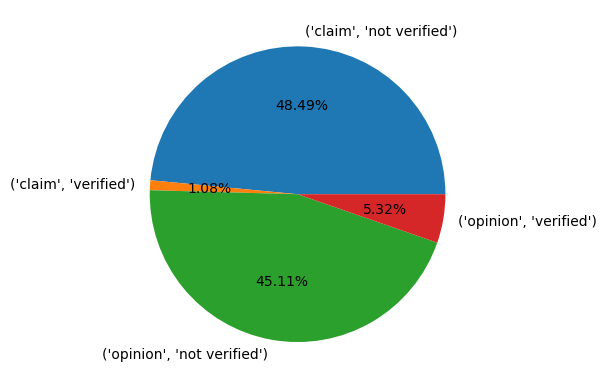

In [39]:
plt.pie(x=verified_st,labels=verified_index,autopct='%1.2f%%')

observations: 
1. 1.08% claim are verified
2. 48.49% claim are not verified
3. 5.32% opinion  are verified
4. 45.11% opinion are not verified

## claim_status vs author_ban_status

In [40]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [41]:
df['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [42]:
ban_s=df.groupby('author_ban_status')['claim_status'].value_counts().values

In [43]:
ban_s_index=df.groupby('author_ban_status')['claim_status'].value_counts().index

([<matplotlib.patches.Wedge at 0x2075e629410>,
 [Text(0.10574480843488535, 1.094905491578643, "('active', 'opinion')"),
  Text(-0.7078703426376028, -0.8419736207353072, "('active', 'claim')"),
  Text(0.6196801121328818, -0.9088435281317566, "('banned', 'claim')"),
  Text(0.8365565433987925, -0.7142640616023351, "('banned', 'opinion')"),
  Text(1.0068675494997965, -0.4429647139042514, "('under review', 'claim')"),
  Text(1.0967138609876055, -0.08496297498121821, "('under review', 'opinion')")],
 [Text(0.05767898641902836, 0.5972211772247142, '46.94%'),
  Text(-0.38611109598414695, -0.4592583385828948, '33.88%'),
  Text(0.3380073338906628, -0.4957328335264126, '7.42%'),
  Text(0.456303569126614, -0.3895985790558191, '1.03%'),
  Text(0.5492004815453434, -0.2416171166750462, '8.27%'),
  Text(0.5982075605386938, -0.046343440898846296, '2.46%')])

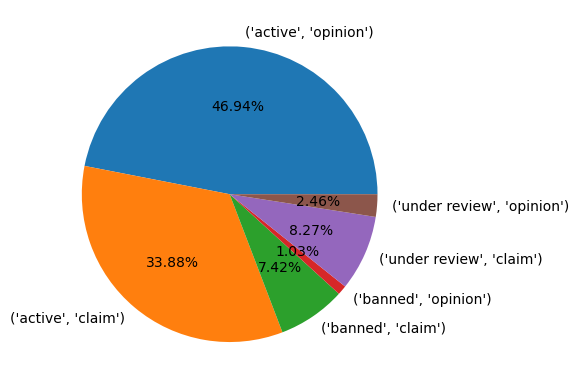

In [44]:
plt.pie(x=ban_s,labels=ban_s_index,autopct='%1.2f%%')

observations:
1. 33.88% of claim are still active
2. 46.94% of opinion are still active
3. 8.27% of claim are under review
4. 7.42% of claim are banned
5. 2.46% of opinion are under review
6. 1.03% of opinion are banned


In [45]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


## now preparing data for model fitting

In [46]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


for claim_status

In [47]:
df['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [48]:
df['claim_status']=df['claim_status'].map({'claim':1,'opinion':2})

In [49]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [50]:
## for video_transcription_text
df['video_transcription_text'].unique()

array(['someone shared with me that drone deliveries are already happening and will become common by 2025',
       'someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet',
       'someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today',
       ..., 'in our opinion the moon is moving away from the earth',
       'in our opinion lightning strikes somewhere on earth about 100 times every second',
       'in our opinion a pineapple plant can only produce one pineapple a year'],
      dtype=object)

In [51]:
## using label encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['video_transcription_text']=le.fit_transform(df['video_transcription_text'])

In [52]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1,7017666017,59,18580,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [53]:
## noe for verified_status
df['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

In [54]:
df['verified_status']=df['verified_status'].map({'not verified':1,'verified':2})

In [55]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1,7017666017,59,18580,1,under review,343296.0,19425.0,241.0,1.0,0.0


In [56]:
##  now for author_ban_status
df['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [57]:
df['author_ban_status']=df['author_ban_status'].map({'under review':1,'active':2,'banned':3})

In [58]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1,7017666017,59,18580,1,1,343296.0,19425.0,241.0,1.0,0.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19382 non-null  int64  
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19382 non-null  int32  
 5   verified_status           19382 non-null  int64  
 6   author_ban_status         19382 non-null  int64  
 7   video_view_count          19382 non-null  float64
 8   video_like_count          19382 non-null  float64
 9   video_share_count         19382 non-null  float64
 10  video_download_count      19382 non-null  float64
 11  video_comment_count       19382 non-null  float64
dtypes: float64(5), int32(1), int64(6)
memory usage: 1.7 MB


In [60]:
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

## now tha data ready for model fitting 